In [1]:
import pickle
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
experiment_id = 0

with open('./experiment_'+str(experiment_id)+'.pickle', 'rb') as file:
    experiment_log = pickle.load(file)

print('Keys:', experiment_log.keys())

Keys: dict_keys(['losses', 'state_visit_log', 'empirical_losses', 'true_density'])


In [3]:
losses = experiment_log['losses']
state_visit_log = experiment_log['state_visit_log']
empirical_losses = experiment_log['empirical_losses']
true_density = experiment_log['true_density']

Loss Plot

In [4]:
total_losses, leaf_losses, inner_flow_losses = zip(*losses)
total_losses, leaf_losses, inner_flow_losses = list(total_losses)[:2500], list(leaf_losses)[:2500], list(inner_flow_losses)[:2500]

In [5]:
def plot_loss_graph(data, title, window_size=20):
    data = {'x': [i for i in range(len(total_losses))], 'y': total_losses}

    # Convert data to DataFrame
    df = pd.DataFrame(data)

    # Calculate moving average with window_size
    df['y_smooth'] = df['y'].rolling(window=window_size).mean()

    # Plot original and smoothed data
    fig = plt.figure(figsize=(6,4))
    plt.plot(df['x'], df['y'], alpha=0.3, label='Original', color='blue')  # Blurry original data points
    plt.plot(df['x'], df['y_smooth'], label='Smoothed', linestyle='--', color='blue')

    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.yscale('log', base=10)
    plt.yticks([1, 1e-2, 1e-4])
    plt.show()

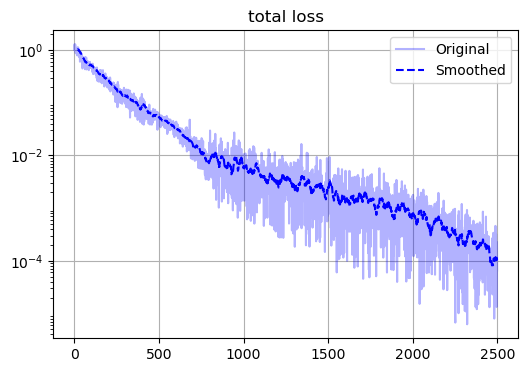

In [6]:
plot_loss_graph(total_losses, 'total loss')

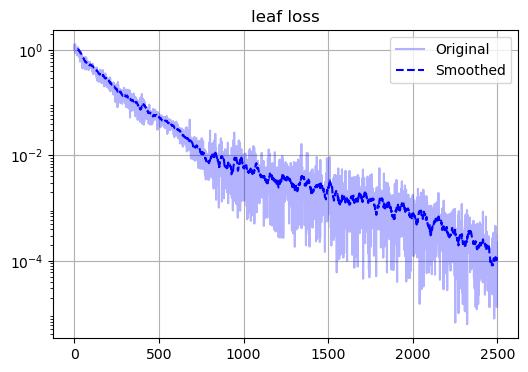

In [7]:
plot_loss_graph(leaf_losses, 'leaf loss')

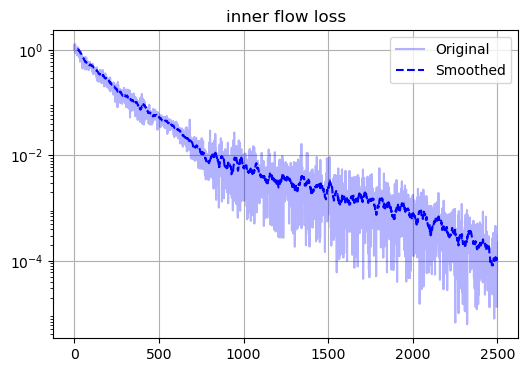

In [8]:
plot_loss_graph(inner_flow_losses, 'inner flow loss')

Distribution

In [9]:
def plot_density(density):
    for i in range(8):
        for j in range(8):
            if (i == 7) and (j == 7):
                continue
            val = "{:.4f}".format(density[i*8+j])
            print(val, end=' ')
        print()
    print()

In [10]:
# true density
print('true density:')
plot_density(true_density)

# estimated density
histogram = defaultdict(int)
all_states = np.int32(list(itertools.product(*[list(range(8))]*2)))[:-1]

for visted_state in state_visit_log:
    histogram[tuple(visted_state)] += 1

z = sum([histogram[tuple(state)] for state in all_states])
estimated_density = [histogram[tuple(state)] / z for state in all_states]

print('estimated density:')
plot_density(estimated_density)

true density:
0.0275 0.0275 0.0046 0.0046 0.0046 0.0046 0.0275 0.0275 
0.0275 0.1193 0.0046 0.0046 0.0046 0.0046 0.1193 0.0275 
0.0046 0.0046 0.0046 0.0046 0.0046 0.0046 0.0046 0.0046 
0.0046 0.0046 0.0046 0.0046 0.0046 0.0046 0.0046 0.0046 
0.0046 0.0046 0.0046 0.0046 0.0046 0.0046 0.0046 0.0046 
0.0046 0.0046 0.0046 0.0046 0.0046 0.0046 0.0046 0.0046 
0.0275 0.1193 0.0046 0.0046 0.0046 0.0046 0.1193 0.0275 
0.0275 0.0275 0.0046 0.0046 0.0046 0.0046 0.0275 

estimated density:
0.0285 0.0285 0.0052 0.0050 0.0047 0.0047 0.0268 0.0275 
0.0289 0.1201 0.0052 0.0053 0.0051 0.0047 0.1155 0.0268 
0.0052 0.0052 0.0046 0.0048 0.0043 0.0043 0.0050 0.0046 
0.0048 0.0053 0.0047 0.0046 0.0047 0.0045 0.0048 0.0049 
0.0047 0.0050 0.0045 0.0043 0.0044 0.0045 0.0047 0.0049 
0.0046 0.0049 0.0044 0.0047 0.0046 0.0045 0.0051 0.0049 
0.0268 0.1159 0.0047 0.0047 0.0048 0.0048 0.1163 0.0268 
0.0276 0.0273 0.0050 0.0046 0.0048 0.0049 0.0274 

